# Linear Models - with all possible variations

## Generativw Additibe Models (GAM)

Generalized Additive Models allow for penalized estimation of smooth terms in generalized linear models.


The following illustrates a Gaussian and a Poisson regression where categorical variables are treated as linear terms and the effect of two explanatory variables is captured by penalized B-splines. 

In [6]:
import statsmodels.api as sm 
from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.gam.tests.test_penalized import df_autos
import numpy as np

x_spline = df_autos[['weight','hp']]
bs = BSplines(x_spline, df = [12,10], degree=[3,3])

In [4]:
df_autos

,city_mpg,fuel,drive,weight,hp
0,21,gas,rwd,2548,111.0
1,21,gas,rwd,2548,111.0
2,19,gas,rwd,2823,154.0
3,24,gas,fwd,2337,102.0
4,18,gas,4wd,2824,115.0
...,...,...,...,...,...
200,23,gas,rwd,2952,114.0
201,19,gas,rwd,3049,160.0
202,18,gas,rwd,3012,134.0
203,26,diesel,rwd,3217,106.0


In [8]:
alpha = np.array([21833888.8, 6460.38479])

gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos,
                             smoother=bs, alpha=alpha)

res_bs = gam_bs.fit()

In [9]:
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   189.13
Model Family:                Gaussian   Df Model:                        12.87
Link Function:               identity   Scale:                          4.8825
Method:                         PIRLS   Log-Likelihood:                -441.81
Date:                Sat, 16 Apr 2022   Deviance:                       923.45
Time:                        20:39:47   Pearson chi2:                     923.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.9923      1.997     26.034   

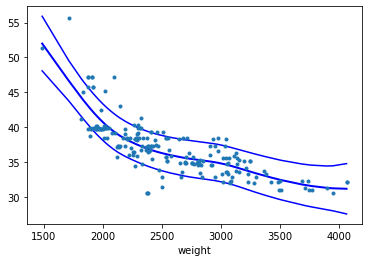

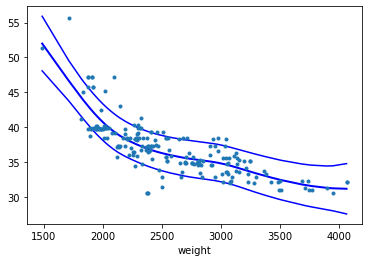

In [10]:
res_bs.plot_partial(0, cpr=True)

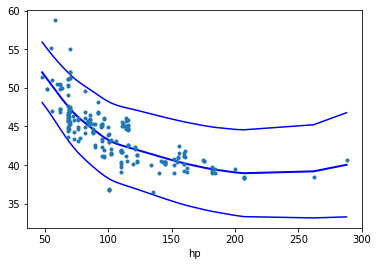

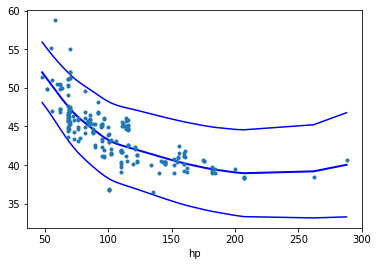

In [11]:
res_bs.plot_partial(1, cpr=True)

In [12]:
alpha = np.array([8283989284.5829611, 14628207.58927821])

gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos, 
                            smoother=bs, alpha=alpha,
                            family=sm.families.Poisson())

In [13]:
res_bs = gam_bs.fit()
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   194.75
Model Family:                 Poisson   Df Model:                         7.25
Link Function:                    Log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -530.38
Date:                Sat, 16 Apr 2022   Deviance:                       37.569
Time:                        20:43:40   Pearson chi2:                     37.4
No. Iterations:                     6   Pseudo R-squ. (CS):             0.7715
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9960      0.130     30.844   

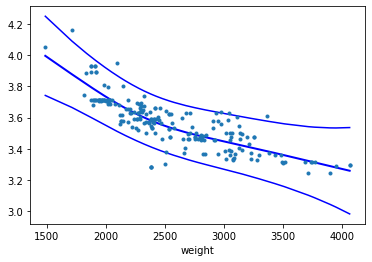

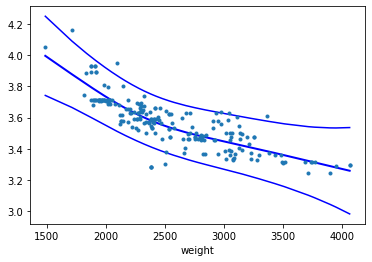

In [14]:
res_bs.plot_partial(0, cpr=True)

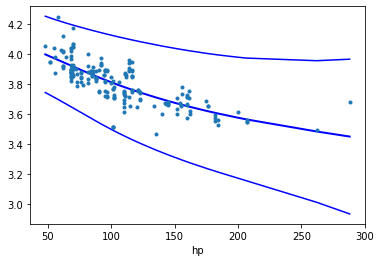

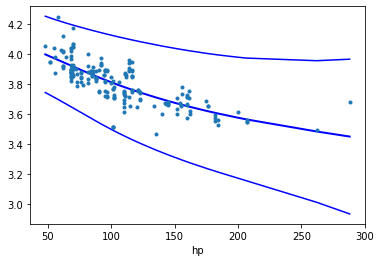

In [15]:
res_bs.plot_partial(1, cpr=True)

## Linear Mixed Effects Models

Linear Mixed Effects models are used for regression analyses involving dependent data. Some specific linear mixed effects models are

- Random intercepts models, where all responses in a group are additively shifted by a value that is specific to the group.

- Random slopes models, where the responses in a group follow a (conditional) mean trajectory that is linear in the observed covariates, with the slopes (and possibly intercepts) varying by group.

- Variance components models, where the levels of one or more categorical covariates are associated with draws from distributions. These random terms additively determine the conditional mean of each observation based on its covariate values.


A simple example of random coefficients, as in (i) above, is:


<img src="random_coefficients.png" alt="drawing" width="500"/>


A simple example of variance components, as in (ii) above, is:


<img src="variance_components.png" alt="drawing" width="380"/>

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


In [17]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            

